<a href="https://www.kaggle.com/code/jonesroy/hw4stp281?scriptVersionId=94438900" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Data extraction**

Going to start off by analyzing my data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import linear_model
from statistics import mean


data_frame = pd.read_csv("../input/music-data-set/Music Data Set (1).csv")
data_frame.head()

,artist.id,artist.name,artist.terms,artist.familiarity,artist.hotttnesss,song.id,song.year,song.time_signature,song.mode,song.key,song.hotttnesss,song.duration,song.end_of_fade_in,song.loudness,song.start_of_fade_out,song.tempo
0,ARD7TVE1187B99BFB1,Casual,hip hop,0.581794,0.401998,SOMZWCG12A8C13C480,NaN,4.0,0,1.0,0.602120,218.93179,0.247,-11.197,218.932,92.198
1,ARMJAGH1187FB546F3,The Box Tops,blue-eyed soul,0.630630,0.417500,SOCIWDW12A8C13D406,1969.0,4.0,0,6.0,NaN,148.03546,0.148,-9.843,137.915,121.274
2,ARKRRTF1187B9984DA,Sonora Santanera,salsa,0.487357,0.343428,SOXVLOJ12AB0189215,NaN,1.0,1,8.0,NaN,177.47546,0.282,-9.689,172.304,100.070
3,AR7G5I41187FB4CE6C,Adam Ant,pop rock,0.630382,0.454231,SONHOTT12A8C13493C,1982.0,4.0,1,NaN,NaN,233.40363,NaN,-9.013,217.124,119.293
4,ARXR32B1187FB57099,Gob,pop punk,0.651046,0.401724,SOFSOCN12A8C143F5D,2007.0,4.0,1,2.0,0.604501,209.60608,0.066,-4.501,198.699,129.738


 there are many missing values for the following attributes (song.year, song.hotttnesss, etc.) which might affect the best fitting line

In [2]:
missing_val_count_by_column = (data_frame.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

artist.terms              5
artist.familiarity       24
artist.hotttnesss       496
song.year              5320
song.key               1213
song.hotttnesss        5786
song.end_of_fade_in    3081
dtype: int64


Here's a summary statistic

In [3]:
sig=data_frame[['song.hotttnesss','song.duration','song.end_of_fade_in','song.loudness','song.start_of_fade_out','song.tempo']] 
sig.describe()

,song.hotttnesss,song.duration,song.end_of_fade_in,song.loudness,song.start_of_fade_out,song.tempo
count,4214.000000,10000.000000,6919.000000,10000.000000,10000.000000,10000.000000
mean,0.459482,240.622038,1.093667,-10.483529,229.883436,122.900913
std,0.168239,246.084090,2.150858,5.399704,112.024303,35.204746
min,0.187895,1.044440,0.060000,-51.643000,-21.394000,0.000000
25%,0.313562,176.032200,0.188500,-13.160000,168.855750,96.959500
50%,0.450762,223.059140,0.328000,-9.379500,213.864500,120.156500
75%,0.586366,276.375060,0.744000,-6.530750,266.274750,144.006750
max,1.000000,22050.000000,43.119000,0.566000,1813.426000,262.828000


In [4]:
df1=data_frame[['song.hotttnesss']] 
df2=data_frame[['song.duration']] 
df3=data_frame[['song.end_of_fade_in']]
df4=data_frame[['song.loudness']]
df5=data_frame[['song.start_of_fade_out']]
df6=data_frame[['song.tempo']]

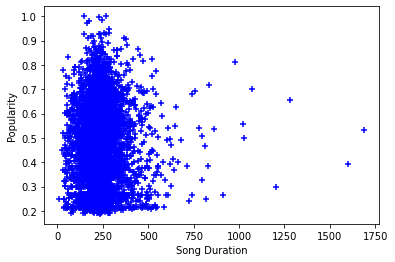

In [5]:
%matplotlib inline
plt.xlabel('Song Duration') #in seconds
plt.ylabel('Popularity') #scale from 0-1
plt.scatter(df2,df1,color='blue',marker='+')

No correlation between popularity and song duration, also the two variables lead to an error as its dataframes contain NaN / large null values

# **Song loudness and Tempo**

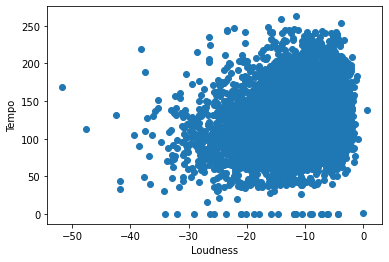

In [6]:
plt.xlabel('Loudness') # Decibels
plt.ylabel('Tempo') #in BPM
plt.scatter(df4,df6)

Fitting the data means I'm training the linear regression model using df4 & df6 datapoints

In [7]:
song_loudness = df4['song.loudness'].tolist()
song_tempo = df6['song.tempo'].tolist()

xs = np.array(song_loudness, dtype=np.float64)
ys = np.array(song_tempo, dtype=np.float64)

def best_fit_line(xs,ys):
    slope = (((mean(xs) * mean(ys)) - mean(xs*ys)) / ((mean(xs) * mean(xs)) - mean(xs*xs)))
    y_intercept = mean(ys) - slope * mean(xs)
    return slope, y_intercept

slope, y_intercept = best_fit_line(xs,ys)
regression_line = [(slope * x) + y_intercept for x in xs]

## Making Predictions

average_decibel = -10
average_tempo = (slope * average_decibel) + y_intercept

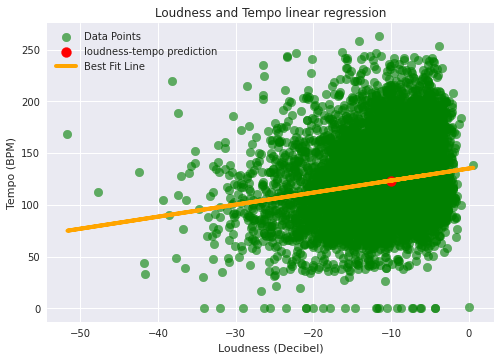

123.46431147568083


In [8]:
# Plot outputs

style.use('seaborn')
plt.scatter(xs,ys, label='Data Points', alpha=0.6, color='green',s=75)
plt.scatter(average_decibel, average_tempo, label = 'loudness-tempo prediction', color='red',s=100)
plt.plot(xs,regression_line, label = 'Best Fit Line', color='orange', linewidth=4)
plt.title('Loudness and Tempo linear regression')
plt.xlabel('Loudness (Decibel)')
plt.ylabel('Tempo (BPM)')
plt.legend()
plt.show()

print(average_tempo)

The red plot shows that if the loudness of the song is -10 in decibel then its associated tempo will be roughly around 123.5 BPM on average